In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
df = pd.read_csv('csv/game.csv')
df.head()
df.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')

In [3]:
df = df[df['season_type'].isin(['Regular Season', 'Playoffs'])]

## PERGUNTA: Qual a relação entre pontos feitos, vitórias e jogos em casa?

# Porcentagem de vitórias em casa por ano

Total de jogos: 64034
Vitórias do time da casa: 39696
Porcentagem de vitórias do time da casa: 61.99%
year
1946    59.375000
1947    60.677966
1948    61.245675
1949    67.368421
1950    71.709234
          ...    
2019    57.379637
2020    52.407932
2021    54.646154
2022    57.485030
2023    56.119792
Length: 77, dtype: float64


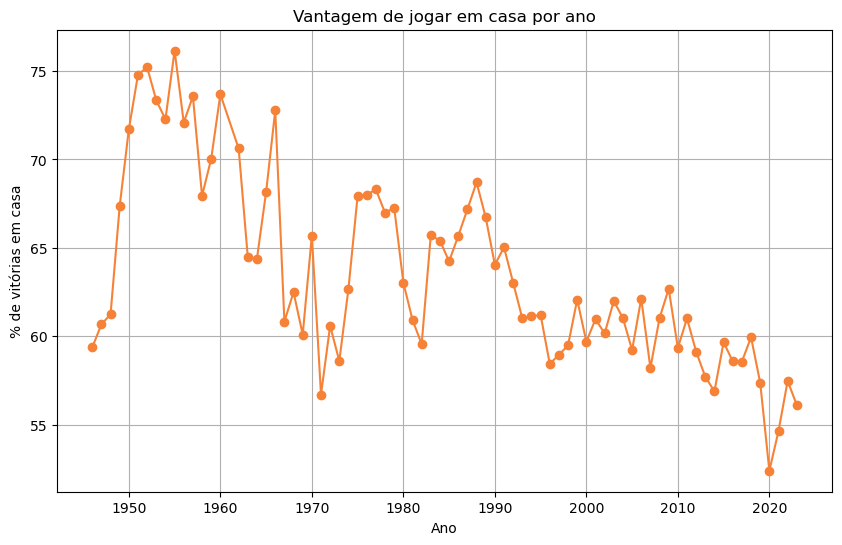

In [6]:
# Análise de porcentagem de vitórias em casa por ano (passou a importar menos com o passar do tempo)

total_jogos = len(df)
vitorias_casa = (df['wl_home'] == 'W').sum()
porcentagem = (vitorias_casa / total_jogos) * 100

print(f"Total de jogos: {total_jogos}")
print(f"Vitórias do time da casa: {vitorias_casa}")
print(f"Porcentagem de vitórias do time da casa: {porcentagem:.2f}%")


df['game_date'] = pd.to_datetime(df['game_date'])
df['year'] = df['game_date'].dt.year
por_ano = df[df['wl_home'] == 'W'].groupby('year').size() / df.groupby('year').size() * 100

# Exibe
print(por_ano)


# Plotar a porcentagem de vitórias em casa por ano
por_ano.plot(kind='line', marker='o', figsize=(10, 6), color='#f68238')
plt.title('Vantagem de jogar em casa por ano')
plt.xlabel('Ano')
plt.ylabel('% de vitórias em casa')
plt.grid(True)
plt.show()


# Pontos totais feitos em casa e fora de casa

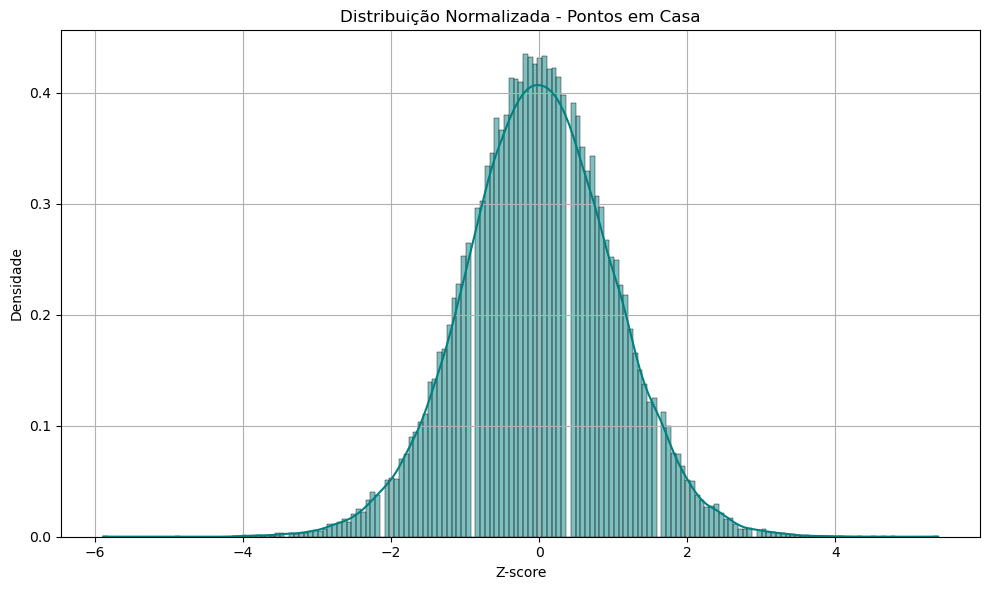

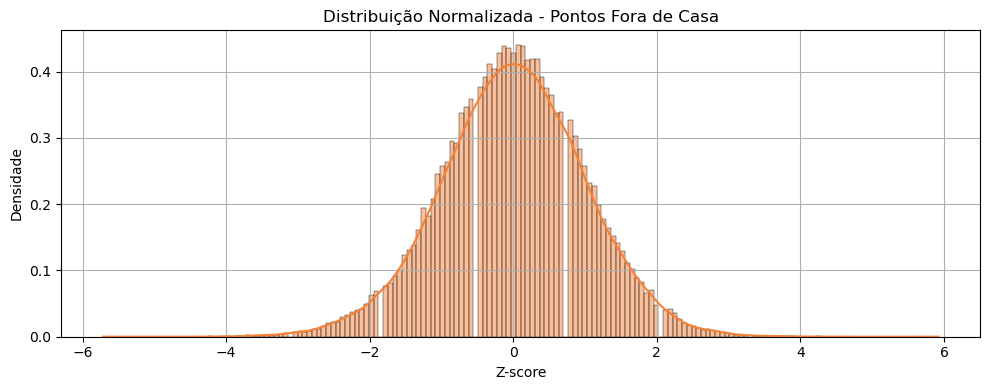

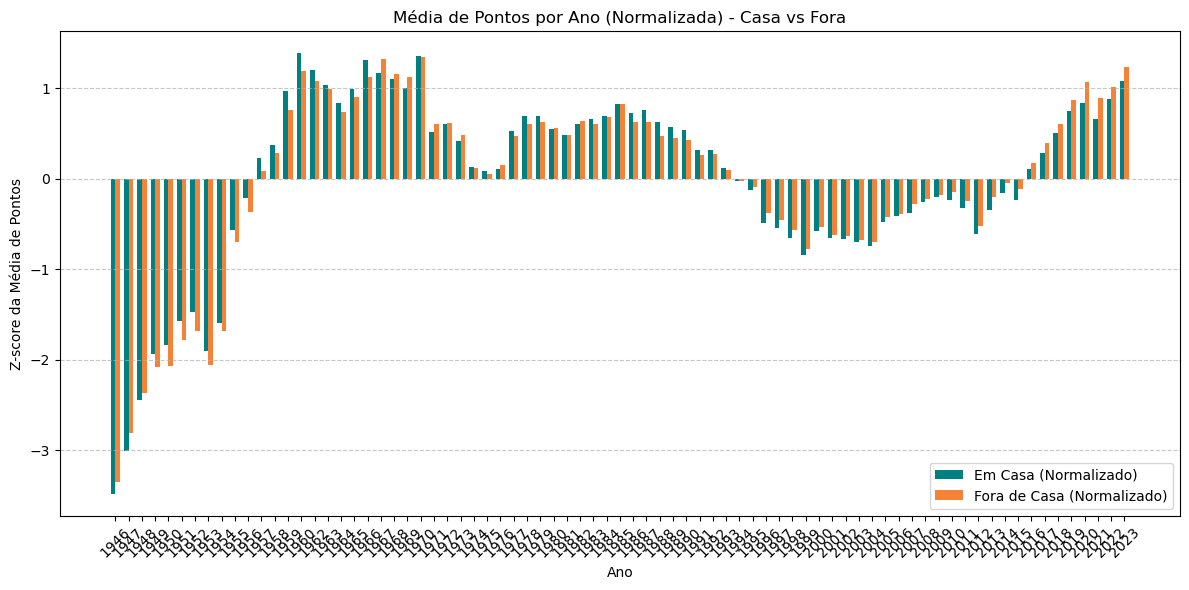

KeyError: 'away_pts'

<Figure size 900x600 with 0 Axes>

In [ ]:
## esses graficos tão normalizados (fiz isso pra gente ter algo de ciencia de dados se quiser)

df['game_date'] = pd.to_datetime(df['game_date'])
df['year'] = df['game_date'].dt.year

# Normalização Z-score
df['pts_home_norm'] = (df['pts_home'] - df['pts_home'].mean()) / df['pts_home'].std()
df['pts_away_norm'] = (df['pts_away'] - df['pts_away'].mean()) / df['pts_away'].std()


# Médias de pontos por ano
media_ano_casa = df.groupby('year')['pts_home'].mean()
media_ano_fora = df.groupby('year')['pts_away'].mean()

# em casa
plt.figure(figsize=(10, 6))
sns.histplot(df['pts_home_norm'], kde=True, stat="density", color='teal')
plt.title('Distribuição Normalizada - Pontos em Casa')
plt.xlabel('Z-score')
plt.ylabel('Densidade')
plt.grid(True)
plt.tight_layout()
plt.show()

# fora de casa
plt.figure(figsize=(10, 4))
sns.histplot(df['pts_away_norm'], kde=True, stat="density", color='#f68238')
plt.title('Distribuição Normalizada - Pontos Fora de Casa')
plt.xlabel('Z-score')
plt.ylabel('Densidade')
plt.grid(True)
plt.tight_layout()
plt.show()


# Médias normalizadas por ano (Z-score)
media_ano_casa_norm = (media_ano_casa - media_ano_casa.mean()) / media_ano_casa.std()
media_ano_fora_norm = (media_ano_fora - media_ano_fora.mean()) / media_ano_fora.std()

# Índice dos anos e largura das barras
anos = media_ano_casa.index
x = np.arange(len(anos))
width = 0.35

# Gráfico combinado
plt.figure(figsize=(12, 6))
plt.bar(x - width/2, media_ano_casa_norm, width, label='Em Casa (Normalizado)', color='teal')
plt.bar(x + width/2, media_ano_fora_norm, width, label='Fora de Casa (Normalizado)', color='#f68238')

plt.title('Média de Pontos por Ano (Z-score Normalizado) - Casa vs Fora')
plt.xlabel('Ano')
plt.ylabel('Z-score da Média de Pontos')
plt.xticks(x, anos, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['pts_home_norm'], kde=True, stat="density", color='teal', label='Casa', alpha=0.7)
sns.histplot(df['pts_away_norm'], kde=True, stat="density", color='#f68238', label='Fora', alpha=0.5)
plt.figure(figsize=(10, 6))
sns.histplot(df['home_pts'], bins=30, kde=True, color='teal')
plt.title('Points Scored Distribution for Home Teams')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Away
plt.figure(figsize=(9, 6))
sns.histplot(df['away_pts'], bins=30, kde=True, color='#f68238')
plt.title('Points Scored Distribution for Away Teams')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

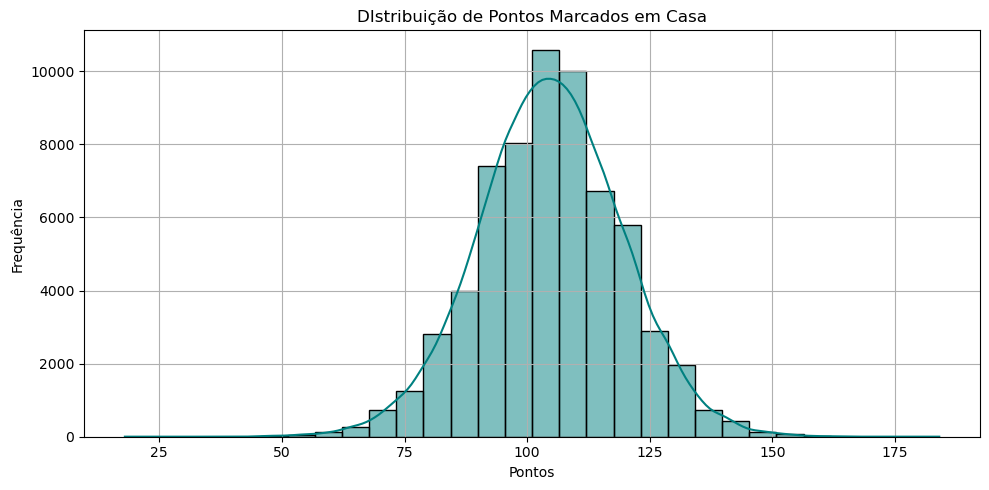

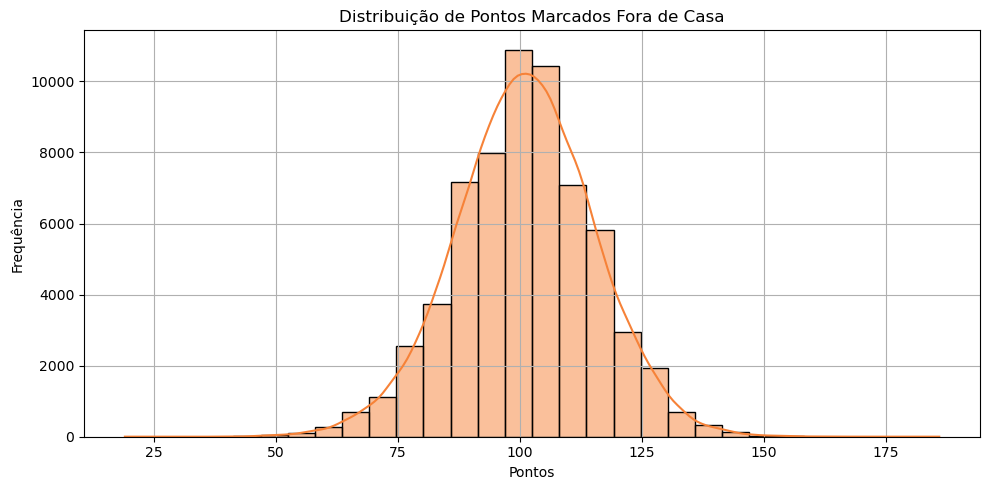

In [ ]:

# sem normalizar!!!

plt.figure(figsize=(10, 6))
sns.histplot(df['pts_home'], bins=30, kde=True, color='teal')
plt.title('DIstribuição de Pontos Marcados em Casa')
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

# Away
plt.figure(figsize=(10, 6))
sns.histplot(df['pts_away'], bins=30, kde=True, color='#f68238')
plt.title('Distribuição de Pontos Marcados Fora de Casa')
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()

# Pontos em casa e fora de casa por time

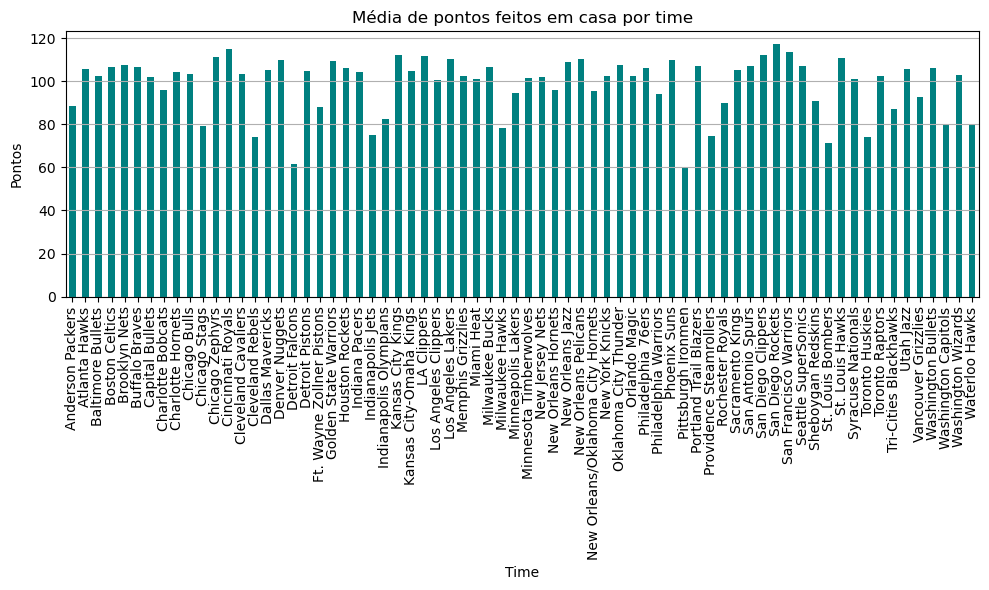

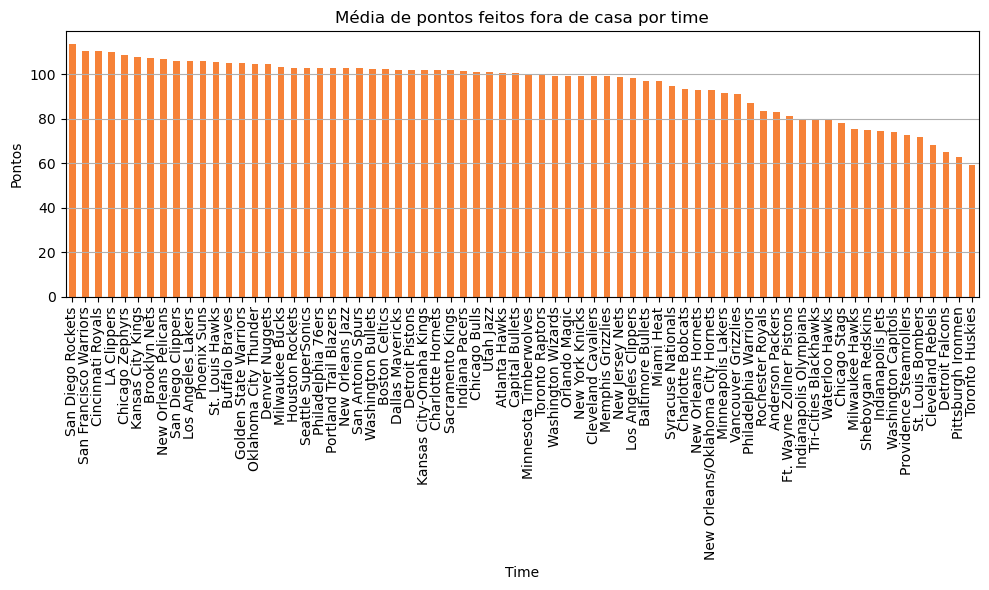

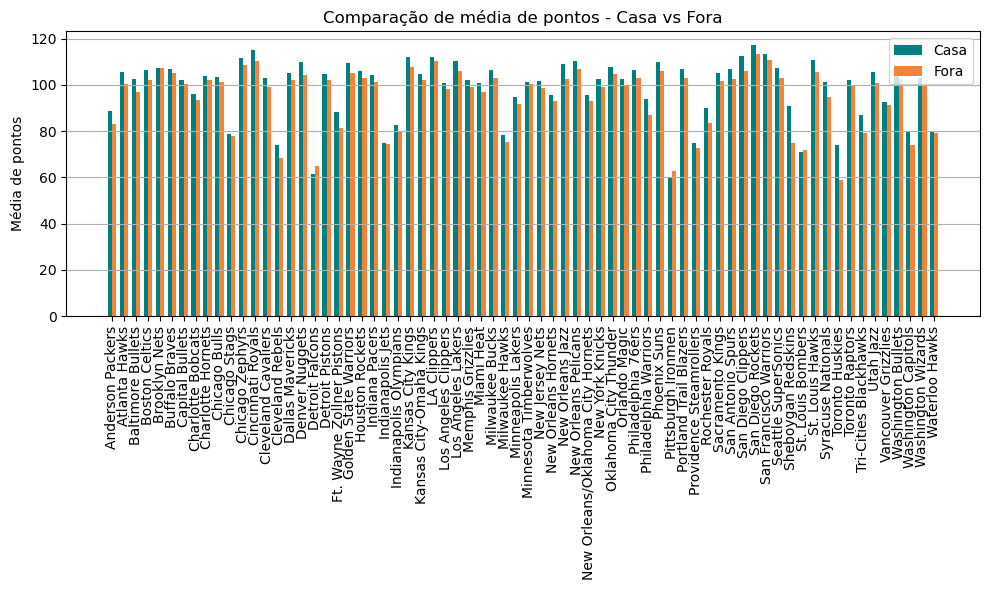

In [12]:
# em casa
media_pontos_casa = df.groupby('team_name_home')['pts_home'].mean()

plt.figure(figsize=(10, 6))
media_pontos_casa.plot(kind='bar', color='teal')
plt.title('Média de pontos feitos em casa por time')
plt.ylabel('Pontos')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# fora de casa
media_pontos_fora = df.groupby('team_name_away')['pts_away'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
media_pontos_fora.plot(kind='bar', color='#f68238')
plt.title('Média de pontos feitos fora de casa por time')
plt.ylabel('Pontos')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# comparação
times = sorted(set(df['team_name_home'].unique()) | set(df['team_name_away'].unique()))
media_casa = df.groupby('team_name_home')['pts_home'].mean().reindex(times)
media_fora = df.groupby('team_name_away')['pts_away'].mean().reindex(times)

x = np.arange(len(times))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, media_casa, width, label='Casa', color='teal')
plt.bar(x + width/2, media_fora, width, label='Fora', color='#f68238')
plt.xticks(x, times, rotation=90)
plt.ylabel('Média de pontos')
plt.title('Comparação de média de pontos - Casa vs Fora')
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()
